For metrics we can use below framework and libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df =pd.read_csv('/content/drive/MyDrive/Datasets/Mobiles Dataset (2025).csv', encoding='latin-1')
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


Error :- The error message UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 139946: invalid start byte

By adding the encoding parameter to pd.read_csv, we explicitly tell pandas which encoding to use when reading the file. Experiment with different encodings such as 'latin-1', 'cp1252', 'iso-8859-1', or others until you find the one that successfully decodes the file.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [4]:
df.describe()

,Launched Year
count,930.000000
mean,2022.193548
std,1.862080
min,2014.000000
25%,2021.000000
50%,2023.000000
75%,2024.000000
max,2025.000000


In [8]:
# Define exchange rates manually (1 unit in local currency = X USD)
exchange_rates = {
    'PKR': 0.0036,  # 1 PKR = 0.0036 USD
    'INR': 0.012,   # 1 INR = 0.012 USD
    'CNY': 0.14,    # 1 CNY = 0.14 USD
    'USD': 1.0,     # 1 USD = 1 USD
    'AED': 0.27     # 1 AED = 0.27 USD
}


# Columns to process
columns_to_change = ['Launched Price (Pakistan)', 'Launched Price (India)',
                     'Launched Price (China)', 'Launched Price (USA)',
                     'Launched Price (Dubai)']

# Convert to USD
for col in columns_to_change:
    df[col] = df[col].astype(str)  # Ensure string type
    df[col + ' (USD)'] = df[col].apply(
        lambda x: exchange_rates.get(x.split()[0], None) * float(x.split()[1].replace(',', ''))
        if isinstance(x, str) and len(x.split()) == 2 and x.split()[0] in exchange_rates else None
    )
df = df.drop(columns=columns_to_change)
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Year,Launched Price (Pakistan) (USD),Launched Price (India) (USD),Launched Price (China) (USD),Launched Price (USA) (USD),Launched Price (Dubai) (USD)
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,2024,809.9964,959.988,811.86,799.0,755.73
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,2024,845.9964,1019.988,853.86,849.0,809.73
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,2024,881.9964,1079.988,909.86,899.0,863.73
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,2024,899.9964,1079.988,867.86,899.0,863.73
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,2024,935.9964,1139.988,909.86,949.0,917.73


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company Name                     930 non-null    object 
 1   Model Name                       930 non-null    object 
 2   Mobile Weight                    930 non-null    object 
 3   RAM                              930 non-null    object 
 4   Front Camera                     930 non-null    object 
 5   Back Camera                      930 non-null    object 
 6   Processor                        930 non-null    object 
 7   Battery Capacity                 930 non-null    object 
 8   Screen Size                      930 non-null    object 
 9   Launched Year                    930 non-null    int64  
 10  Launched Price (Pakistan) (USD)  929 non-null    float64
 11  Launched Price (India) (USD)     930 non-null    float64
 12  Launched Price (China)

In [ ]:
df.dropna(inplace=True)


In [12]:
# Convert columns to string first, then remove units and convert to numbers
df['Mobile Weight'] = df['Mobile Weight'].astype(str).str.replace('g', '').astype(float)
df['RAM'] = df['RAM'].astype(str).str.split('/').str[0].str.extract(r'(\d+)').astype(float)
df['Front Camera'] = df['Front Camera'].astype(str).str.split('/').str[0].str.extract(r'(\d+\.?\d*)').astype(float)
df['Back Camera'] = df['Back Camera'].astype(str).str.split('+').str[0].str.extract(r'(\d+\.?\d*)').astype(float)
df['Battery Capacity'] = df['Battery Capacity'].astype(str).str.replace(',', '').str.replace('mAh', '').astype(float)
df['Screen Size'] = df['Screen Size'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 0 to 928
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company Name                     928 non-null    object 
 1   Model Name                       928 non-null    object 
 2   Mobile Weight                    928 non-null    float64
 3   RAM                              928 non-null    float64
 4   Front Camera                     928 non-null    float64
 5   Back Camera                      928 non-null    float64
 6   Processor                        928 non-null    object 
 7   Battery Capacity                 928 non-null    float64
 8   Screen Size                      928 non-null    float64
 9   Launched Year                    928 non-null    int64  
 10  Launched Price (Pakistan) (USD)  928 non-null    float64
 11  Launched Price (India) (USD)     928 non-null    float64
 12  Launched Price (China) (USD

In [14]:
df.describe()

,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Year,Launched Price (Pakistan) (USD),Launched Price (India) (USD),Launched Price (China) (USD),Launched Price (USA) (USD),Launched Price (Dubai) (USD)
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,228.243966,7.774784,18.180603,46.757328,5027.512931,7.082683,2022.189655,449.709455,603.497108,531.325948,622.383254,586.307328
std,105.544997,3.179277,11.993146,31.103036,1356.697382,1.535156,1.862194,361.509183,486.369098,379.253404,1347.294092,416.834549
min,135.000000,1.000000,2.000000,5.000000,2000.000000,5.000000,2014.000000,57.596400,71.988000,69.860000,79.000000,80.730000
25%,185.000000,6.000000,8.000000,15.250000,4440.000000,6.500000,2021.000000,197.996400,239.988000,237.860000,250.000000,270.000000
50%,194.000000,8.000000,16.000000,50.000000,5000.000000,6.670000,2023.000000,305.998200,419.988000,392.000000,449.000000,452.250000
75%,208.000000,8.000000,32.000000,50.000000,5100.000000,6.780000,2024.000000,647.996400,898.800000,769.860000,849.000000,863.730000
max,732.000000,16.000000,60.000000,200.000000,11200.000000,14.600000,2025.000000,1980.000000,3299.988000,2519.860000,39622.000000,2996.730000


from matplotlib import pyplot as plt
_df_0['Mobile Weight'].plot(kind='hist', bins=20, title='Mobile Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['RAM'].plot(kind='hist', bins=20, title='RAM')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Front Camera'].plot(kind='hist', bins=20, title='Front Camera')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Back Camera'].plot(kind='hist', bins=20, title='Back Camera')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Mobile Weight', y='RAM', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='RAM', y='Front Camera', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Front Camera', y='Back Camera', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Back Camera', y='Battery Capacity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Mobile Weight'].plot(kind='line', figsize=(8, 4), title='Mobile Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['RAM'].plot(kind='line', figsize=(8, 4), title='RAM')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Front Camera'].plot(kind='line', figsize=(8, 4), title='Front Camera')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Back Camera'].plot(kind='line', figsize=(8, 4), title='Back Camera')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
df.median(numeric_only=True)

,0
Mobile Weight,194.0000
RAM,8.0000
Front Camera,16.0000
Back Camera,50.0000
Battery Capacity,5000.0000
Screen Size,6.6700
Launched Year,2023.0000
Launched Price (Pakistan) (USD),305.9982
Launched Price (India) (USD),419.9880
Launched Price (China) (USD),392.0000


In [16]:
most_expensive = df.loc[df['Launched Price (India) (USD)'].idxmax()]
most_expensive

,661
Company Name,Huawei
Model Name,Mate XT 512GB
Mobile Weight,245.0
RAM,12.0
Front Camera,13.0
Back Camera,50.0
Processor,Kirin 9010
Battery Capacity,5000.0
Screen Size,7.92
Launched Year,2024


In [17]:
least_expensive = df.loc[df['Launched Price (India) (USD)'].idxmin()]
least_expensive

,796
Company Name,Infinix
Model Name,Smart HD 32GB
Mobile Weight,195.0
RAM,2.0
Front Camera,5.0
Back Camera,8.0
Processor,MediaTek Helio A20
Battery Capacity,5000.0
Screen Size,6.1
Launched Year,2020


In [18]:
# Calculate average price per year
avg_price_per_year = df.groupby("Launched Year")["Launched Price (India) (USD)"].mean()
avg_price_per_year

,Launched Price (India) (USD)
Launched Year,
2014,167.988000
2016,205.144800
2017,489.033333
2018,679.687429
2019,603.460696
2020,602.515485
2021,506.829688
2022,586.536322
2023,621.657848


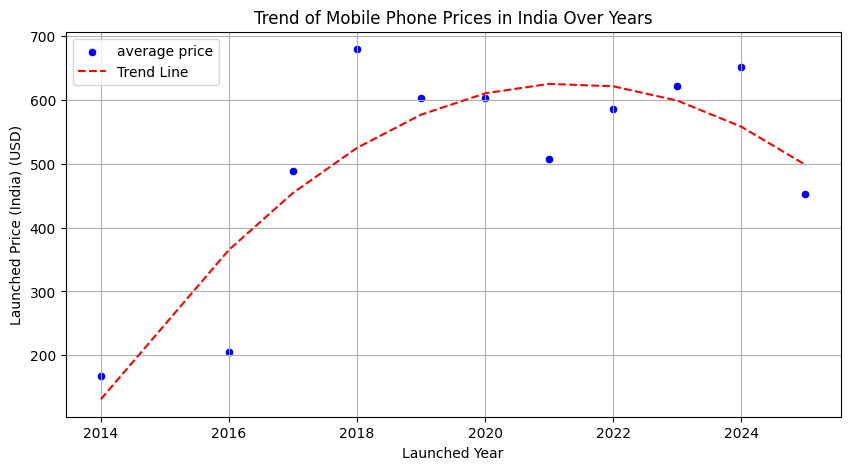

In [19]:
plt.figure(figsize=(10,5))

# Scatter plot of average prices
sns.scatterplot(x=avg_price_per_year.index,
               y=avg_price_per_year,
               label='average price',
               color='blue')

# Fit a polynomial trend line (degree=2)
z = np.polyfit(avg_price_per_year.index, avg_price_per_year, 2)
p = np.poly1d(z)

# Plot trend line
plt.plot(avg_price_per_year.index, p(avg_price_per_year.index),
         color='red', linestyle="--", label="Trend Line")

plt.title("Trend of Mobile Phone Prices in India Over Years")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
avg_price_per_ram = df.groupby('RAM')['Launched Price (India) (USD)'].mean()
print(avg_price_per_ram)

RAM
1.0      117.988000
2.0      117.970000
3.0      298.954941
4.0      390.470301
6.0      527.332136
8.0      557.237187
10.0     611.988000
12.0     920.318513
16.0    1098.181548
Name: Launched Price (India) (USD), dtype: float64


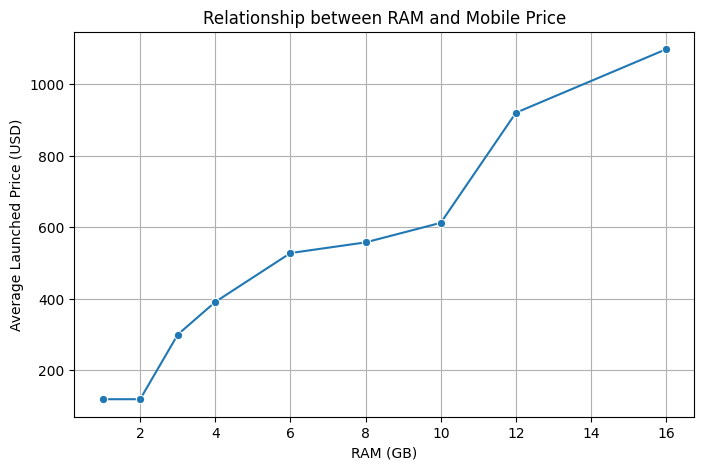

In [21]:
# Plotting RAM vs. Price
plt.figure(figsize=(8,5))
sns.lineplot(x=avg_price_per_ram.index,
             y=avg_price_per_ram,
             marker='o')

plt.xlabel("RAM (GB)")
plt.ylabel("Average Launched Price (USD)")
plt.title("Relationship between RAM and Mobile Price")
plt.grid(True)
plt.show()

In [22]:
avg_price_by_country = df[
    ["Launched Price (Pakistan) (USD)",
     "Launched Price (India) (USD)",
     "Launched Price (China) (USD)",
     "Launched Price (USA) (USD)",
     "Launched Price (Dubai) (USD)"]
].mean().sort_values(ascending=False)
avg_price_by_country

,0
Launched Price (USA) (USD),622.383254
Launched Price (India) (USD),603.497108
Launched Price (Dubai) (USD),586.307328
Launched Price (China) (USD),531.325948
Launched Price (Pakistan) (USD),449.709455


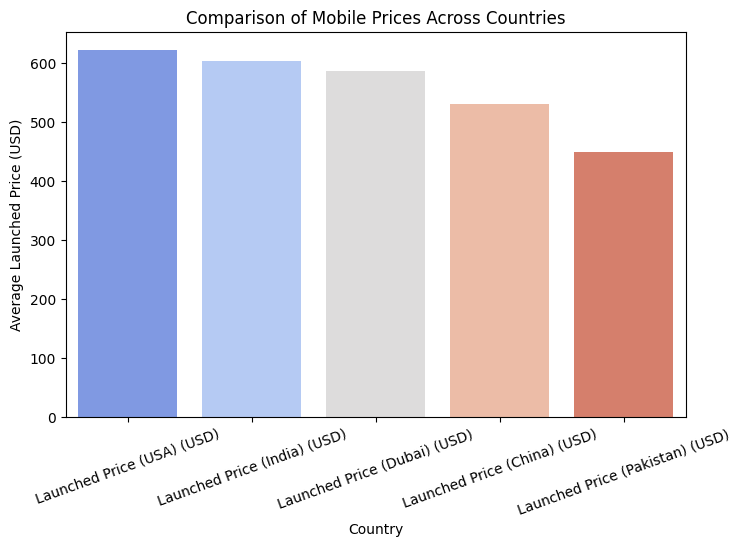

In [23]:
# Plot the average prices
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_by_country.index, y=avg_price_by_country.values, palette="coolwarm")

plt.xlabel("Country")
plt.ylabel("Average Launched Price (USD)")
plt.title("Comparison of Mobile Prices Across Countries")
plt.xticks(rotation=20)
plt.show()

In [24]:
company_avg_price = df.groupby("Company Name")[
    ["Launched Price (Pakistan) (USD)",
     "Launched Price (India) (USD)",
     "Launched Price (China) (USD)",
     "Launched Price (USA) (USD)",
     "Launched Price (Dubai) (USD)"]
].mean()
company_avg_price

,Launched Price (Pakistan) (USD),Launched Price (India) (USD),Launched Price (China) (USD),Launched Price (USA) (USD),Launched Price (Dubai) (USD)
Company Name,,,,,
Apple,891.460318,1235.983175,1005.423711,1028.484536,994.554742
Google,620.567829,843.988000,848.526667,755.190476,816.158571
Honor,432.629367,586.207780,471.706154,607.571429,605.746484
Huawei,660.725143,1233.582857,960.790000,1116.571429,1126.015714
Infinix,158.074971,207.845143,218.610000,245.071429,245.863929
Lenovo,226.796400,304.708800,294.784000,311.666667,316.530000
Motorola,329.686723,404.310581,378.311613,433.258065,433.467581
Nokia,186.542182,165.260727,162.145455,3760.181818,178.200000
OnePlus,485.317291,548.818189,552.992075,608.622642,663.013019


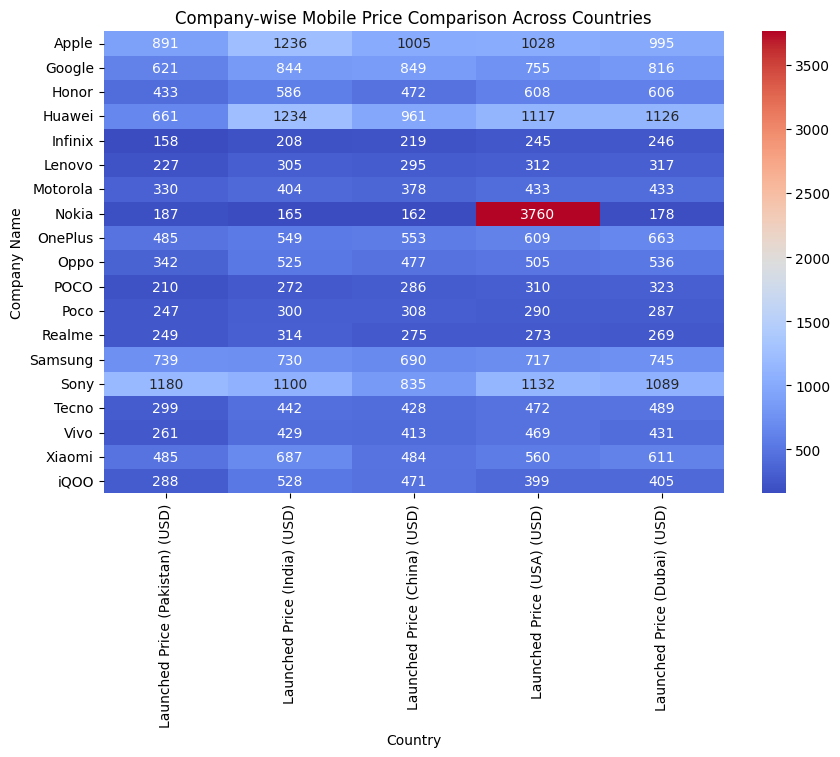

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(company_avg_price, annot=True, fmt=".0f", cmap="coolwarm")

plt.title("Company-wise Mobile Price Comparison Across Countries")
plt.xlabel("Country")
plt.ylabel("Company Name")
plt.show()

In [28]:
# Count the number of mobile phones from each company
mobile_counts = df['Company Name'].value_counts().sort_values(ascending=False)
mobile_counts

,count
Company Name,
Oppo,129
Apple,97
Honor,91
Vivo,86
Samsung,86
Realme,69
Motorola,62
Infinix,56
OnePlus,53


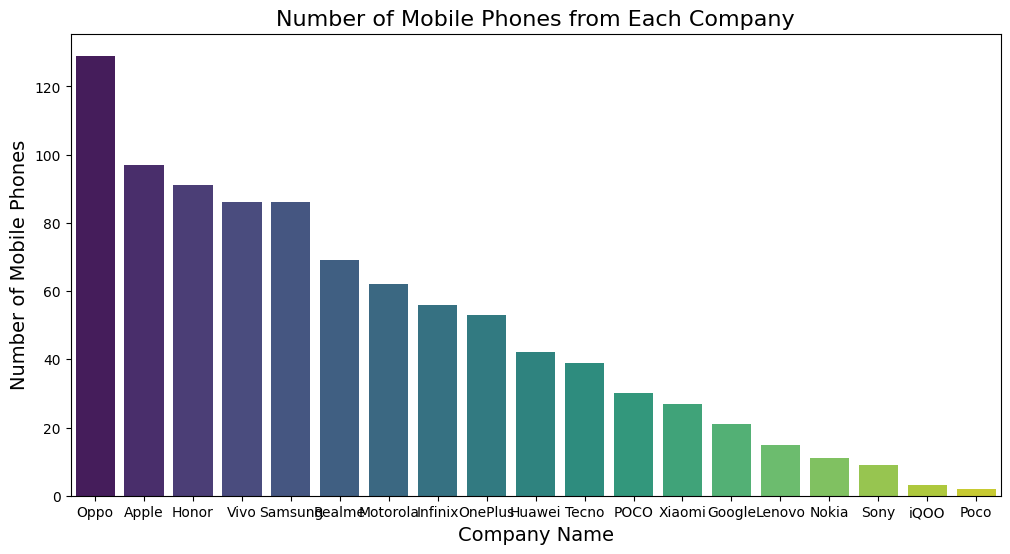

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x=mobile_counts.index, y=mobile_counts.values, palette='viridis')

# Adding labels and title
plt.xlabel('Company Name', fontsize=14)
plt.ylabel('Number of Mobile Phones', fontsize=14)
plt.title('Number of Mobile Phones from Each Company', fontsize=16)
plt.xticks(rotation=0)
plt.show()

In [30]:
brand_pricing_india=df.groupby("Company Name")["Launched Price (India) (USD)"].describe()
brand_pricing_india = brand_pricing_india.sort_values(by="mean", ascending=False)
brand_pricing_india = brand_pricing_india.reset_index()
brand_pricing_india

,Company Name,count,mean,std,min,25%,50%,75%,max
0,Apple,97.0,1235.983175,354.118213,358.800,1018.800,1199.988,1439.988,2398.800
1,Huawei,42.0,1233.582857,807.235774,419.988,659.988,1019.988,1439.988,3299.988
2,Sony,9.0,1099.988000,368.646172,599.988,719.988,1139.988,1439.988,1559.988
3,Google,21.0,843.988000,430.753758,383.988,539.988,719.988,959.988,2159.988
4,Samsung,86.0,729.946884,515.008203,101.988,239.907,749.988,1124.097,2123.988
5,Xiaomi,27.0,687.099111,389.265712,179.988,317.988,839.988,1019.988,1319.988
6,Honor,91.0,586.207780,447.336557,131.988,263.988,419.988,779.988,1919.988
7,OnePlus,53.0,548.818189,235.164569,155.988,335.988,539.988,719.988,899.988
8,iQOO,3.0,527.988000,72.000000,455.988,491.988,527.988,563.988,599.988
9,Oppo,129.0,525.101395,354.589273,107.988,263.988,443.988,599.988,1919.988


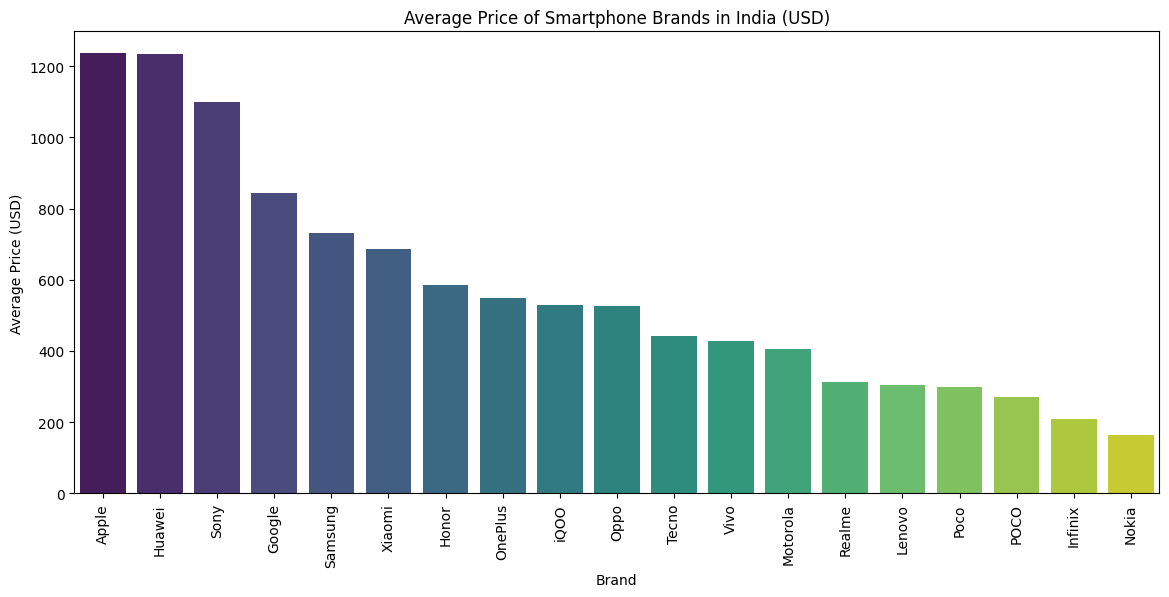

In [31]:
plt.figure(figsize=(14, 6))
sns.barplot(data=brand_pricing_india, x="Company Name", y="mean", palette="viridis")
plt.xticks(rotation=90)  # Rotate brand names for better readability
plt.title("Average Price of Smartphone Brands in India (USD)")
plt.xlabel("Brand")
plt.ylabel("Average Price (USD)")
plt.show()